<a href="https://colab.research.google.com/github/Lilllyay/ANN-Research---Breast-Cancer/blob/main/ANN_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cancerData.csv')
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace = True)
Y = df['diagnosis'].to_numpy()
X = df.drop(['id', 'diagnosis','Unnamed: 32'],axis = 1)

,0
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64
fractal_dimension_mean,float64


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.25,random_state=4)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

array([[-0.08311803,  1.20706138,  0.0211503 , ...,  0.58899121,
         1.22050305,  1.92033957],
       [-0.51406443, -1.57272774, -0.53909308, ..., -0.29853859,
        -0.12446418, -0.86496108],
       [ 1.30452939, -0.37581028,  1.32492143, ...,  1.89611106,
         1.46207483,  0.46409917],
       ...,
       [-0.02565851, -0.82149547, -0.09272707, ..., -0.4777528 ,
        -1.25234326, -0.89854545],
       [-0.99097845, -0.93866014, -1.01122697, ..., -1.7308796 ,
        -0.31543647, -1.19915311],
       [ 2.91339595,  0.22149978,  3.09126741, ...,  1.69783151,
         0.52027132, -0.18336349]])

,accuracy,loss,val_accuracy,val_loss
0,0.866197,0.494723,0.944056,0.383861
1,0.934272,0.331796,0.937063,0.278242
2,0.941315,0.240271,0.951049,0.203178
3,0.955399,0.183836,0.937063,0.167406
4,0.964789,0.145190,0.958042,0.141825
...,...,...,...,...
95,1.000000,0.000047,0.972028,0.168163
96,1.000000,0.000052,0.972028,0.187417
97,1.000000,0.000046,0.972028,0.193610
98,1.000000,0.000042,0.972028,0.182189


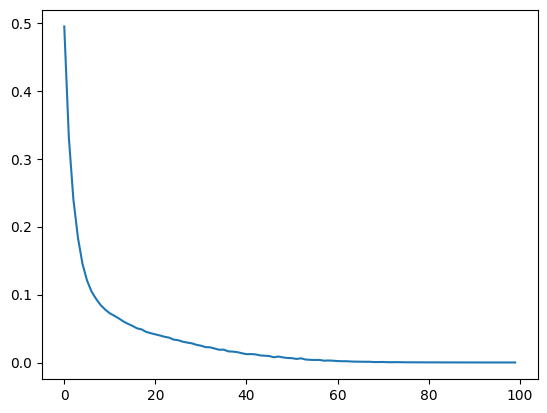

In [ ]:
model = Sequential()
model.add(Dense(22, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled,Y_train,epochs = 100,verbose=0, validation_data = (X_val_scaled,Y_val))
J_list = model.history.history['loss']
plt.plot(J_list)
losses = pd.DataFrame(model.history.history)
losses

In [ ]:
bce = BinaryCrossentropy()
y_val_hat = model.predict(X_val_scaled)
print('Validation error =',bce(Y_val.reshape(-1,1), y_val_hat).numpy())

y_train_hat = model.predict(X_train_scaled)
print('Training error =',bce(Y_train.reshape(-1,1), y_train_hat).numpy())

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Validation error = 0.17360826
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training error = 3.4670364e-05


In [ ]:
y_train_hat_cat = 1*(y_train_hat > 0.5)
print(classification_report(Y_train,y_train_hat_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       164

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [ ]:
y_val_hat_cat = 1*(y_val_hat > 0.5)
print(classification_report(Y_val,y_val_hat_cat))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        95
           1       0.94      1.00      0.97        48

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

